In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

**Separação dos Datasets**

In [ ]:
y = df['Cateter'].to_numpy()
x = df[['Peso' , 'Altura']].to_numpy()

**Normalização dos Dados**

In [ ]:
x_normal = (x - x.mean(axis=0)) / x.std(axis=0)

N , D = x_normal.shape
x_normal = np.hstack((np.ones((N,1)),x_normal))

y_normal = (y - y.mean(axis=0)) / y.std(axis=0)


**Gradiente Descendente**

In [ ]:
def calculoErroQuadrado( w ,x , y , i):
  return (y[i] - w @ x[i].T) * x[i]

def gd(alpha , x , y , num_epochs):
  #definir os w iniciais
  w_antigo =  np.random.rand(x.shape[1])

  for epochs in range(num_epochs):
    sum_erro = 0
    #somatorios dos erros
    for i in range(len(x)):
      sum_erro += calculoErroQuadrado(w_antigo , x , y , i)

    w_atual = w_antigo + alpha*(1/x.shape[0])*sum_erro
    w_antigo = w_atual
  return w_atual;

def predict(w , x ):
  y_pred = []
  for i in range(x.shape[0]):
    y_pred.append(w.transpose() @ x[i])
  return y_pred

**GRADIENTE DESCENDENTE ESTOCASTICO**

In [ ]:
def shuffle(X,y):
  assert len(X) == len(y)
  p = np.random.permutation(len(X))
  return X[p], y[p]

def gdEstocastico(alpha , x , y , num_epochs):
  #definir os w iniciais
  w =  np.random.rand(3)

  for epochs in range(num_epochs):
    erro = 0
    for i in range(len(x)):
      erro = calculoErroQuadrado(w , x , y , i)
      w_atual = w + alpha*erro
      w = w_atual
    x,y = shuffle(x,y)

  return w_atual;

**REGRESSÃO LINEAR ANALÍTICA**

In [ ]:
def anali(x,y):
  return np.linalg.inv(x.transpose() @ x) @ x.transpose() @ y

In [ ]:
w = gd(0.01, x_normal , y_normal , 10000)
w_esto = gdEstocastico(0.01 , x_normal , y_normal ,10000)
w_ana = anali(x_normal,y_normal)
Y_pred= predict(w_ana,x_normal)
print("W analitico {}".format(w_ana))
print("W Gradiente descendente {}".format(w))
print("W Gradiente descendente Estocastico {}".format(w_esto))
print("Y ANALITICO: {}".format(predict(w_ana,x_normal)))
print("Y Gradiente Descendente {}".format(Y_pred))
print("Y Gradiente descendente Estocastico {}".format(predict(w_esto,x_normal)))
print("Y Real {}".format(y_normal))

W analitico [3.46944695e-16 6.08893878e-01 3.07583303e-01]
W Gradiente descendente [3.60322440e-16 6.13633320e-01 3.02843861e-01]
W Gradiente descendente Estocastico [-0.00078992  0.6011054   0.30946727]
Y ANALITICO: [0.11148165579334063, 1.9743735891138292, -0.14100130437770883, -0.22140290890712241, 0.4770288525347196, -0.5655988873365403, 0.08025565777472185, -1.2037086534149806, -0.21547471436851307, -1.1523864126572767, -0.6160128358471378, 1.4724459616926722]
Y Gradiente Descendente [0.11148165579334063, 1.9743735891138292, -0.14100130437770883, -0.22140290890712241, 0.4770288525347196, -0.5655988873365403, 0.08025565777472185, -1.2037086534149806, -0.21547471436851307, -1.1523864126572767, -0.6160128358471378, 1.4724459616926722]
Y Gradiente descendente Estocastico [0.11050892914777702, 1.960111700810903, -0.1414429773536055, -0.21979784703909871, 0.4727550526837494, -0.5601003021515317, 0.0797841789755819, -1.1981943111848508, -0.2152183598418398, -1.147019391276364, -0.6126697

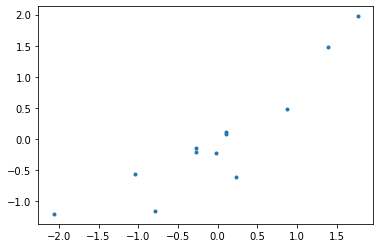

In [ ]:
plt.plot(y_normal,Y_pred, '.')

In [ ]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

x_normal = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))

y_normal = (y - y.min(axis=0))/(y.max(axis=0) - y.min(axis=0))

N , D = x_normal.shape
x_n = np.hstack((np.ones((N,1)),x_normal))

w_ana = anali(x_n , y_normal)

w = gd(0.01, x_n , y_normal , 10000)

Y_pred= predict(w,x_n)

#print("W analitico {}".format(w_ana))
#
#print("W Gradiente descendente {}".format(w))
#print("Y ANALITICO: {}".format(predict(w_ana,X)))
#print("Y Gradiente Descendente {}".format(Y_pred))
#print("Y Real {}".format(y))

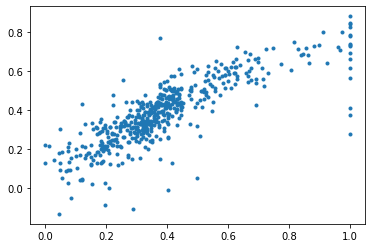

In [ ]:
plt.plot(y_normal,Y_pred, '.')

In [ ]:
w += alpha * ( error * X).mean(axis=0)
#Cálculo do somatorio sem for 

NameError: ignored